## 1) Introduction

### Analyzing the relationship between hearth health, age, sex and numerous cardiac health measurements for patients in Cleveland

### Over the past few years, heart diseases have seen a rapid rise in prevalence. This due to a number of factors such as the consumption of more highly processed, fatty foods as well as the lack of exercise. While diet is a key element in this increase, I'm curious as to whether factors that are not in our control play a role in increased heart disease. If I'm older, is it 100% true that I'm at a higher risk of heart disease than someone only five years younger? Do the needs of men and women differ when it comes to avoiding heart disease? 

Coming back to diet, a common word that is often tossed around as 'bad for you' is cholestrol. However, I've often heard people debate over this topic. For example, eggs are high cholestrol foods, but they're also known as a powerhouse of nutrition. Many people I know consume numerous eggs everyday and are extremely physically healthy. No one would assume they're at a higher risk of heart disease. So I want to test out the claim that cholestrol is bad for you. Does a higher cholestrol really lead to higher blood pressure levels and poor heart health? 

Questions like these are a few examples of why I'm interested in this dataset and why others might be too. 

### Research Questions:
1. <u>What is the relationship between age and the patient's blood pressure at rest? How does the relationship between these two change  if we segregate based on the sex of the patient?</u>
    - When people talk about risk of heart disease, they often talk about numbers such as cholestrol and blood pressure levels. However, I was curious as to how big of an impact factors that we cannot control (such as age and sex) have on our heart health. Do men and women have to take care of their health differently? Is the impact of age really as big as perceived? These are some questions I wanted to get insight into.

2. <u>Are the average cholestrol levels in normal people equal to the average cholestrol levels in people with heart disease?</u>
    - There is an ongoing debate on 'good' and 'bad' cholestrol. As I mentioned earlier, many people avoid consuming eggs because of its high cholestrol content. However, others argue that there are no disadvantages to doing so. This question serves to see if there is any sort of relationship between cholestrol levels and the hearth health of a person (whether they're normal or have a heart disease)


3. <u>How is the blood pressure level (in mm/HG) affected by the cholestrol levels, maximum heart rate, exercise induced st depression and the age of the patient?</u>
    - The higher the blood pressure levels of a person, the higher they are at a risk of heart diseases. I was curious as to which of the numeric variables (age, heart rate, cholestrol level, exercise induced st depression) had the greatest effect on increasing the risk of heart problems for an individual. This information would be extremely useful in hospitals as well because any of these variables could serve as a warning to possible future heart problems. The regression would tell any medical practioner which variables to focus on more and which can be disregarded (based on the value of coefficients in the regression).


4. <u>What is the relationship between cholestrol levels, blood pressure levels, maximum heart rate, exercise induced st depression and the heart health of the patient?</u>
    - This question serves to see if patients with a heart disease have differing values of the above variables when compared to patients with normal hearth health. Similar to my reason for performing my linear regression, the reason I chose to inquire into this question was because I wanted to compare the level of impact each of these variables had on the hearth health of an individual.

### Dataset Details
Age: Patients Age in years (Numeric)

Sex: Gender (Male : 1; Female : 0) (Nominal)

cp: Type of chest pain experienced by patient. This term categorized into 4 category.
0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)

trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)

chol: Serum cholesterol in mg/dl (Numeric)

fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)

restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)

thalach: Maximum heart rate achieved (Numeric)

exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)

oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)

slope: ST segment measured in terms of slope during peak exercise

0: up sloping; 1: flat; 2: down sloping(Nominal)

ca: The number of major vessels (0–3)(nominal)

thal: A blood disorder called thalassemia
0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)

target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
df = pd.read_csv('Heart_disease_cleveland_new.csv')
df.head(6)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   
5   56    1   1       120   236    0        0      178      0      0.8      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  
5   0     1       0

In [7]:
df.shape

(303, 14)

There are some limitations to my datatset. The most obvious limitation to my data is that it is only focused on patients from Cleveland. Hence, there are several factors/variables such as the diet, environment, air quality, water quality, etc that could affect the heart health of a person. Therefore, it is important to realize that the relationships I find through my statistical analysis should not be intepreted as purely causal because theure could be confounders in the data. Adding variables like the ones I mentioned and separating their effect on heart health from the variables that already exist (cholestrol levels, blood pressure etc.) could provide more clarity as to variables that impact the heart health of an individual. 

## 2) Descriptive Analysis Research Question Set

<u> What is the relationship between age and the patient's blood pressure at rest? How does the relationship between these two change if we segregate based on the sex of the patient?</u>

Points of note:
- First, I'll look at the relationship between age and blood pressure using a line of best fit. This is because a line of best fit would allow us to see a very clear relationship between the two variables.
- When only looking at the relationship between age and blood pressure, I'm going to hold the variable of heart health constant (by creating a new dataframe) so that I can clearly observe the relationship only between age and blood pressure. 

In [60]:
df_twovar = df[df.target == 0]
df_twovar.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   
5   56    1   1       120   236    0        0      178      0      0.8      0   
7   57    0   3       120   354    0        0      163      1      0.6      0   

   ca  thal  target  
0   0     2       0  
3   0     1       0  
4   0     1       0  
5   0     1       0  
7   0     1       0

Text(0.5, 1.0, 'Relationship between age and blood pressure levels')

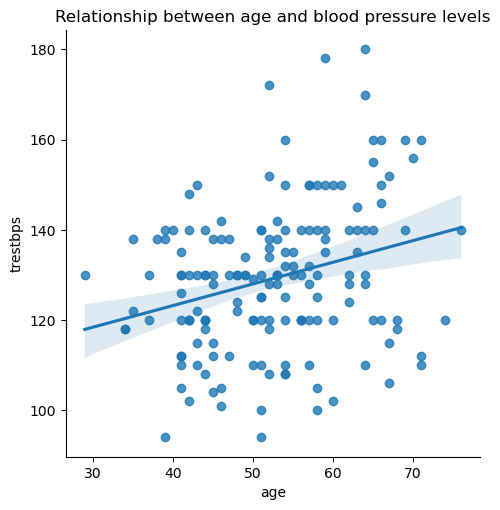

In [64]:
sns.lmplot(x='age', y='trestbps', data=df_twovar)
plt.title('Relationship between age and blood pressure levels')

As we can see above, there is a very slight positive correlation between the two. We can quanitfy this relationship using the R-squared value shown below: 

In [72]:
descriptivemod = smf.ols('trestbps~age', data=df_twovar).fit()
descriptivemod.rsquared

0.0794983380237112

As shown above, the R^2 value is only 0.07949. This shows an extremely small positive correlation between the two variables. I believe, this level of significance may not be worth noting.

Now, I will observe how this relationship varies based on sex. I'll first categorize the numerical values of 0 and 1 provided by the dataset for sex. This is just for ease of understanding: 

In [87]:
df_dup = df
df_dup['sex_cat'] = df_dup['sex'].map({0:'Female', 1:'Male'})
df_dup.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target sex_cat  
0   0     2       0    Male  
1   3     1       1    Male  
2   2     3       1    Male  
3   0     1       0    Male  
4   0     1       0  Female

Once again, the best way to observe the relationship betwee all three variables would be through a scatterplot and line of best fit. This is shown below:

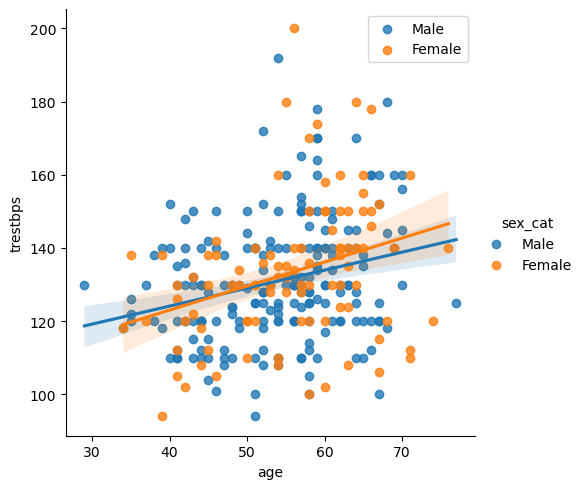

In [88]:
sns.lmplot(x='age', y='trestbps', hue='sex_cat', data=df_dup)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

We can see from above that the correlation between age and blood pressure levels is stronger for women compared to men. However, as seen in the graph, this is by an extremely miniscule amount. Most of the values for both men and female seem to grouped together in the center so I don't believe that correlation between age and blood pressure levels is very signifcantly impacted by the sex of the person. However, it is worth noting that at a younger age (<50), women have a lower blood pressure level. But, as people get older (>50), women seem to be at a higher risk for increased blood pressure levels. This is a finding worth looking into. 

The relationships shown by the graphs answer my research question. There is no significant correlation between age and blood pressure levels. This relationship does not change significanrly with the introduction of sex. However, an interesting finding observed is that as people grow older, women may be more susceptible to higher blood pressure levels.  

To obtain an alternate view of the relationship just between sex and blood pressure levels, the variables can be plotted using a violinplot. This is shown below:

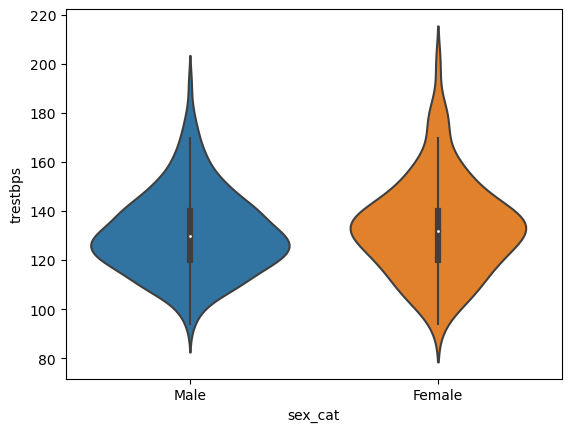

In [78]:
sns.violinplot(x='sex_cat',y='trestbps',data=df_dup)
plt.show()

## 3) Inference Research Question Set

<u>Do the cholestrol levels differ in patients who have a heart disease and patients who have normal health?</u>

This is a difference in means question:
- µ<sub>h</sub> represents the mean cholestrol levels for patients that have a heart disease
- µ<sub>n</sub> represent the mean cholestrol levels for patients that have normal health

**Hypothesis**

Null: µ<sub>h</sub> - µ<sub>n</sub> = 0

Alternative: µ<sub>h</sub> - µ<sub>n</sub> > 0

**Conditions**

1. Sample of patients with normal health levels is randomly sampled: this condition is satisfied. 
2. $n_{h}=164<10$% of all patients in Cleveland who have normal levels of health: this condition is satisfied because it can be assumed that the total number of people in Cleveland with normal health is definitely greater 1640.
3. Sample with patients with heart disease is randomly sampled: this condition is satisfied. 
4. $n_{n}=139<10$% of all patients in Cleveland who have a heart disease: this condition is satisfied because it can be assumed that the number of people in Cleveland who have a heart disease is greater than 1390.   
5. $n_{h}=164>30$ OR <s>the population (or sample) distribution of patients with normal health cholestrol levels is normal.</s>
5. $n_{n}=139>30$ OR <s>the population (or sample) distribution of patients with heart disease cholestrol levels is normal.</s> 
6. We can assume that there is no pairwise relationship between the cholestrol levels of both groups in this sample.

**Calculating p-value by hand**

Calculating sample mean for sample with patients of normal health $\bar{x}$<sub>n</sub>: 242.6402

In [48]:
df_normal = df[df.target == 0]
df_normal['target'].shape

(164,)

In [50]:
df_normal['chol'].describe()

count    164.000000
mean     242.640244
std       53.456580
min      126.000000
25%      208.750000
50%      234.500000
75%      267.250000
max      564.000000
Name: chol, dtype: float64

Calculating sample mean for sample with patients with heart disease $\bar{x}$<sub>h</sub>: 251.4748

In [49]:
df_disease = df[df.target == 1]
df_disease['target'].shape

(139,)

In [51]:
df_disease['chol'].describe()

count    139.000000
mean     251.474820
std       49.486835
min      131.000000
25%      217.500000
50%      249.000000
75%      283.500000
max      409.000000
Name: chol, dtype: float64

test statistic = 
$\frac{(\bar{x}_{h}-\bar{x}_{n}) - (\mu_{h} - \mu_{n})}{    \sqrt{\frac{s^2_{h}}{n_{h}}  +\frac{s^2_{n}}{n_{n}} }           }$

In [54]:
xh = 251.4748
xn = 242.6402
nh = 139
nn = 164
sn_sqr = (53.4565)**2
sh_sqr = (49.4868)**2
t_stat_num = (xh-xn)-0
t_stat_den = ((sh_sqr/nh) + (sn_sqr/nn))**.5
t_stat = t_stat_num/t_stat_den
t_stat

1.4924104594918108

In [56]:
#We don't know population standard deviation so we're using the t distribution
from scipy.stats import t
pval = 1 - t.cdf(1.49241,df=138)
pval

0.06893716012943929

**Hypothesis Test Conclusion**

The assumed confidence level at which this hypothesis conducted is 95% i.e. $\alpha$ = 0.05. The calculated p-value was 0.0689. Since 0.0689 > 0.05 (i.e. p-value > $\alpha$), there is not enough evidence to reject the null. Hence, I cannot conclude that patients with heart disease do seem to have higher cholestrol levels than patients with normal health. 

**How does the conclusion answer the research question?**

My research question set out to answer if cholestrol levels were an indication of heart health i.e. did individuals with better heart health seem to have lower cholestrol levels. The hypothesis test for difference in means concluded that there is not enough evidence to conclude that the difference between the cholestrol levels for patients with heart disease and those with normal health is greater than 0. Hence, it answered my research question by suggesting tha those with poor hearth health don't seem to have higher levels of cholestrol (no relationship between the two). 

## 4) Linear Regression Research Question Set 

<u>How is the blood pressure level (in mm/HG) affected by the cholestrol levels, maximum heart rate, exercise induced st depression and the age of the patient?</u>

In [10]:
#First, we separate the columns of the dataset we're using:
df_lin = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
df_lin

age  trestbps  chol  thalach  oldpeak
0     63       145   233      150      2.3
1     67       160   286      108      1.5
2     67       120   229      129      2.6
3     37       130   250      187      3.5
4     41       130   204      172      1.4
..   ...       ...   ...      ...      ...
298   45       110   264      132      1.2
299   68       144   193      141      3.4
300   57       130   131      115      1.2
301   57       130   236      174      0.0
302   38       138   175      173      0.0

[303 rows x 5 columns]

**Summary output for Linear Regression**

In [31]:
results = smf.ols('trestbps~chol+age+thalach+oldpeak', data=df_lin).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               trestbps   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     9.826
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.77e-07
Time:                        00:21:05   Log-Likelihood:                -1279.6
No. Observations:                 303   AIC:                             2569.
Df Residuals:                     298   BIC:                             2588.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.7706     11.546      6.822      0.000      56.048     101.493
chol           0.0213      0.019      1.120      0.263      -0.016       0.059
age            0.5584      0.119      4.705      0.000       0.325       0.792
thalach        0.0974      0.048      2.034      0.043       0.003       0.192
oldpeak        2.5954      0.882      2.943      0.004       0.860       4.331
==============================================================================
Omnibus:                       17.815   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.199
Skew:                           0.531   Prob(JB):                     4.11e-05
Kurtosis:                       3.688   Cond. No.                     3.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Linear Regression Equation**

$yhat = 78.7706 + 0.0213*chol + 0.5584*age + 0.0974*thalach + 2.5954*oldpeak$

**Conditions**

   - **Linearity condition:** As seen by the residual vs. fitted value plot below, the values are pretty evenly spaced out above and below the x axis. There is an exception of two outliers. However, since there are only two outliers, I believe it is reasonable to say that the linearity condition is satisfied. 
   - **Constant variance of residuals:** As seen through the residual vs fitted value plot below, the y axis spread of points very slightly change as we move from left to right. Hence, I believe it would be appropriate to say that the condition is slightly not met.
   - **True errors are normally dsitributed:** The graph is not normally distributed. It is unimodal and significantly skewed to the right and is not centered  at 0 i.e. does not have a mean 0. Due to the skewness and the fact that it is not centered at 0, I believe the condition of normality of errors is not satisifed.    
   - **Independence of residuals**: 
       - data is randomly sampled
       - sample size n <10% of pop
           - The size of the sample is 303. It is safe to assume that the number of patients in Cleveland is greater than 3030. Hence, this condition is satisifed as well.
   - **No Multicollinearity:** We can see from the pairplots below that most pairwise variables do not seem to have a  relationship. The only slighlty significant relationship that seems to exist is between thalach and age that has an R value of -0.39. (can I ignore this?)

In [32]:
#Checking for linearity:
results.fittedvalues

0      139.488371
1      136.685263
2      140.370872
3      132.048097
4      126.391366
          ...    
298    125.489301
299    143.407269
300    127.702712
301    132.569037
302    120.562260
Length: 303, dtype: float64

In [33]:
results.resid

0       5.511629
1      23.314737
2     -20.370872
3      -2.048097
4       3.608634
         ...    
298   -15.489301
299     0.592731
300     2.297288
301    -2.569037
302    17.437740
Length: 303, dtype: float64

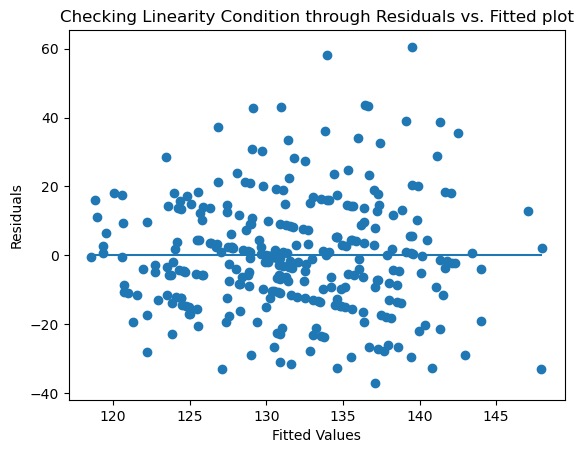

In [34]:
plt.scatter(x=results.fittedvalues, y=results.resid)
plt.hlines(y=0, xmin=np.min(results.fittedvalues), xmax=np.max(results.fittedvalues))
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.title('Checking Linearity Condition through Residuals vs. Fitted plot')
plt.show()

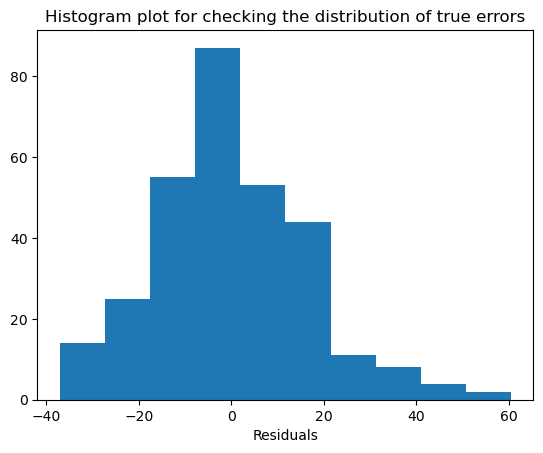

In [35]:
#Checking condition 3: true errors are normally distributed
plt.hist(results.resid)
plt.title('Histogram plot for checking the distribution of true errors')
plt.xlabel('Residuals')
plt.show()

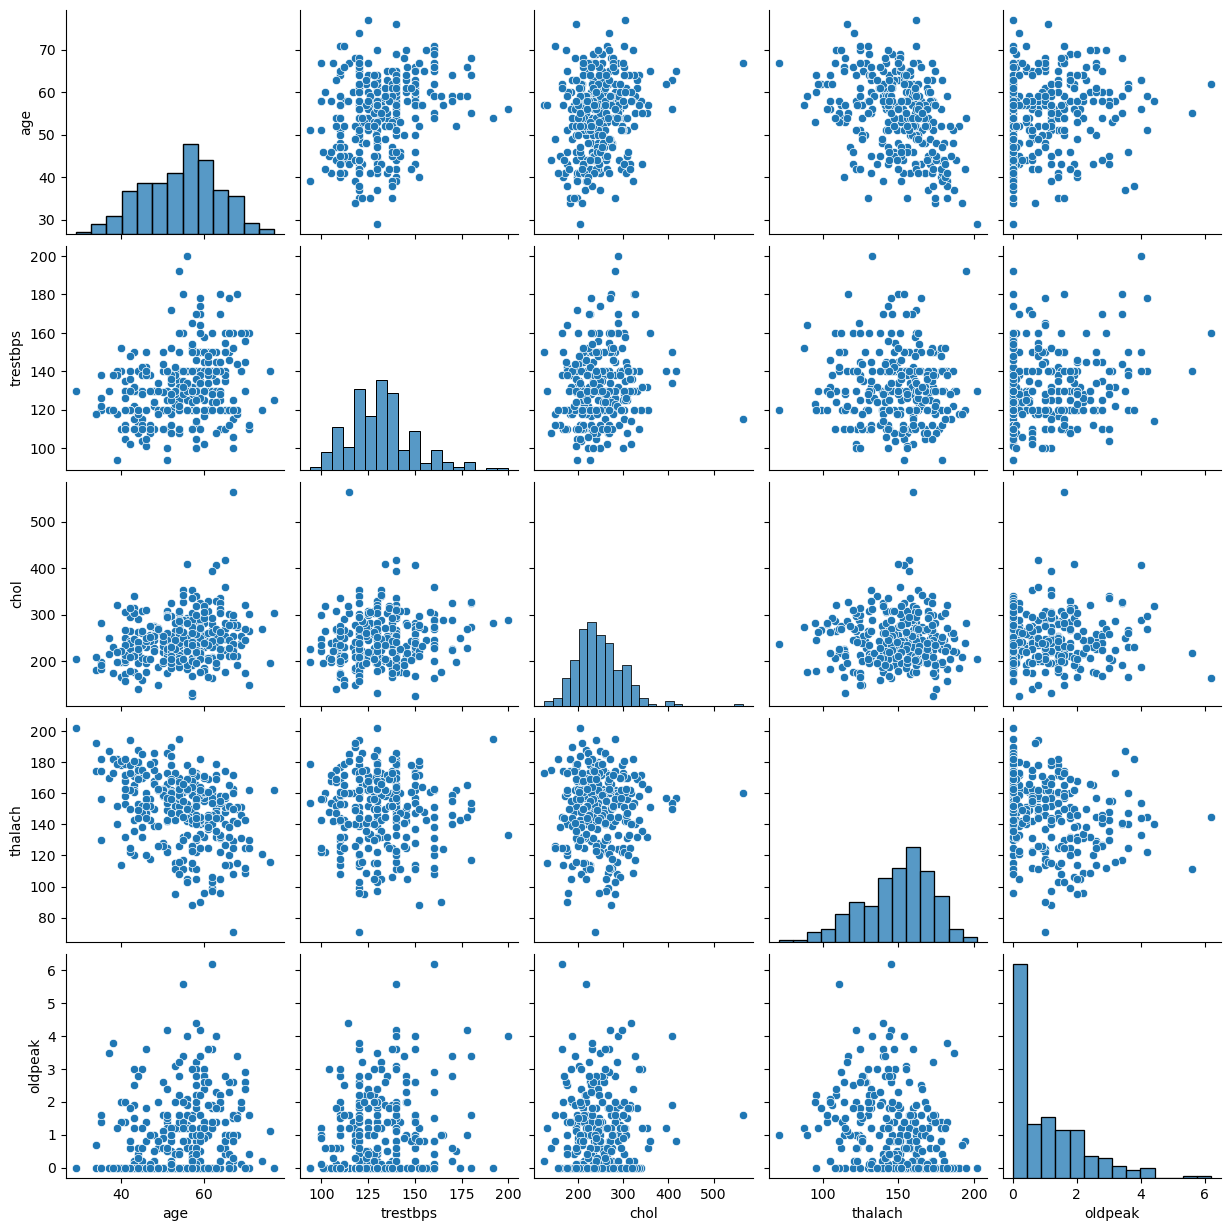

In [36]:
#Observing if there exist in pairwise relationships within the data
sns.pairplot(df_lin)
plt.show()

In [37]:
#Quantifying this relationship to get a clearer picture of pairwise relationships
df_lin.corr()

age  trestbps      chol   thalach   oldpeak
age       1.000000  0.284946  0.208950 -0.393806  0.203805
trestbps  0.284946  1.000000  0.130120 -0.045351  0.189171
chol      0.208950  0.130120  1.000000 -0.003432  0.046564
thalach  -0.393806 -0.045351 -0.003432  1.000000 -0.343085
oldpeak   0.203805  0.189171  0.046564 -0.343085  1.000000

Testing the model with a prediction - **what is the patient's blood pressure level at 40 years of age, 200mg/dL cholestrol, max heart rate(thalach) of 174, and an exercise induced ST depression of 2.0?**

$yhat = 78.7706 + 0.0213*200 + 0.5584*40 + 0.0974*174 + 2.5954*2$

$yhat = 78.7706 + 48.7344$

$yhat = 127.505$

**Blood pressure level = 127.505 mm/HG**

**Determining which slopes (variables) are significant in a population model** - Done by comparison to the p value 

Let's assume a 95% confidence to make conclusions about which slopes can be non zero:
- **Slope for chol:** As seen in the summary, the p value for chol is 0.263. This is significantly larger than 0.05. Hence, we don't have enough evidence to reject the null and conclude that this is a non-zero slope
- **Slope for age:** The p value for this slope is approximately 0 i.e. p < 0.05 and we have enough evidence to reject the null and conclude that the slope for age is non-zero
- **Slope for thalach:** The p value for this slope is 0.043 i.e. p<0.05, hence there is enough evidence to reject null and conclude that the slope for thalach is non-zero
- **Slope for oldpeak:** The p value for this slope is 0.004 i.e. p<0.05, hence there is enough evidence to reject null and conclude that the slope for oldpeak is non-zero

## 5) Logistic Regression Question Set

<u>Is there a relationship between cholestrol levels, blood pressure levels, maximum heart rate, exercise induced st depression and the log odds of the heart health of the patient?</u>

**Splitting the dataset into a training and testing**

The training data set will be a random selection of 80% of the observation from df, and the test will be 20%.

In [5]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size=0.20,
                                     random_state=123)
#Double checking the percentage of values in df_train:
df_train.shape[0]/df.shape[0]

0.7986798679867987

**Performing a backwards elimination algorithm to find a parsimino** Starting with four (or more) explanatory variables and using your training
dataset, perform a backwards elimination algorithm (using AIC or BIC) to
help you find a parsimonious logistic regression model

<u>Iteration 1 of backwards elimination - fitting the model with all 4 explanatory variables:</u>

In [30]:
mod1 = smf.logit('target~chol+trestbps+thalach+oldpeak',data=df).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.534858
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 May 2023   Pseudo R-squ.:                  0.2246
Time:                        01:35:28   Log-Likelihood:                -162.06
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.993e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8226      1.502      1.214      0.225      -1.121       4.766
chol           0.0033      0.003      1.241      0.214      -0.002       0.008
trestbps       0.0125      0.008      1.552      0.121      -0.003       0.028
thalach       -0.0345      0.007     -5.072      0.000      -0.048      -0.021
oldpeak        0.6985      0.141      4.956      0.000       0.422       0.975
==============================================================================
"""

In [13]:
print('Iteration 1 BIC with all 4 variables:',mod1.bic)

Iteration 1 BIC with all 4 variables: 369.5278438293357


Deleting the explanatory variable 'thalach' from the regression:

In [31]:
mod2 = smf.logit('target~chol+trestbps+oldpeak',data=df).fit()
mod2.summary()
print('Iteration 1 BIC with thalach deleted:', mod2.bic)

Optimization terminated successfully.
         Current function value: 0.583828
         Iterations 6
Iteration 1 BIC with thalach deleted: 376.6544913903219


Deleting thalach resulted in a higher BIC, so I'm going to try another variable.

Deleting the explanatory variable 'oldpeak' from the regression:

In [32]:
mod3 = smf.logit('target~chol+trestbps+thalach',data=df).fit()
mod3.summary()
print('Iteration 1 BIC with oldpeak deleted:', mod3.bic)

Optimization terminated successfully.
         Current function value: 0.582251
         Iterations 6
Iteration 1 BIC with oldpeak deleted: 375.6992373026347


Deleting the explanatory variable 'trestbps' from the regression:

In [33]:
mod4 = smf.logit('target~chol+thalach+oldpeak',data=df).fit()
print('Iteration 1 BIC with trestbps deleted:', mod4.bic)

Optimization terminated successfully.
         Current function value: 0.538857
         Iterations 6
Iteration 1 BIC with trestbps deleted: 349.4024895972183


The value of BIC fell, however, given the chance that deleting 'chol' may yield a smaller BIC value:

Deleting the explanatory variable 'chol' from the regression: 

In [34]:
mod5 = smf.logit('target~trestbps+thalach+oldpeak',data=df).fit()
print('Iteration 1 BIC with chol deleted:', mod5.bic)

Optimization terminated successfully.
         Current function value: 0.537454
         Iterations 6
Iteration 1 BIC with chol deleted: 348.55207598653203


As seen above, the model that observed the lowest value of BIC was mod5. Hence, this becomes the new model and the following iteration tests out BIC with the remaining variables of 'thalach', 'trestbps', and 'oldpeak'.

<u> Iteration 2 of backwards elimination: </u>

In [39]:
print('Current BIC:', mod5.bic)

Current BIC: 348.55207598653203


Deleting the variable 'thalach' from mod5 regression: 

In [35]:
mod6 = smf.logit('target~trestbps+oldpeak',data=df).fit()
print('Iteration 2 BIC with thalach deleted:', mod6.bic)

Optimization terminated successfully.
         Current function value: 0.585503
         Iterations 6
Iteration 2 BIC with thalach deleted: 371.9559118755397


Deleting the variable 'oldpeak' from mod5 regression:

In [36]:
mod7 = smf.logit('target~trestbps+thalach',data=df).fit()
print('Iteration 2 BIC with oldpeak deleted:', mod7.bic)

Optimization terminated successfully.
         Current function value: 0.585233
         Iterations 6
Iteration 2 BIC with oldpeak deleted: 371.7922444106459


Deleting the variable 'trestbps' from mod5 regression:

In [37]:
mod8 = smf.logit('target~thalach+oldpeak',data=df).fit()
print('Iteration 2 BIC with trestbps deleted:', mod8.bic)

Optimization terminated successfully.
         Current function value: 0.542314
         Iterations 6
Iteration 2 BIC with trestbps deleted: 345.7834487744224


As seen above, the model that observed the lowest value of BIC was mod8. Hence, this becomes the new current model and the following iteration tests out BIC with the remaining variables of 'thalach', and 'oldpeak'.

<u> Iteration 3 of backwards elimination: </u>

In [38]:
print('Current BIC:',mod8.bic)

Current BIC: 345.7834487744224


Deleting the variable 'thalach' from mod8 regression:

In [40]:
mod9 = smf.logit('target~oldpeak',data=df).fit()
print('Iteration 3 BIC with thalach deleted:',mod9.bic)

Optimization terminated successfully.
         Current function value: 0.589440
         Iterations 6
Iteration 3 BIC with thalach deleted: 368.6280693661783


Deleting the variable 'oldpeak' from mod8 regression:

In [43]:
mod10 = smf.logit('target~thalach',data=df).fit()
print('Iteration 3 BIC with oldpeak deleted:',mod10.bic)

Optimization terminated successfully.
         Current function value: 0.595548
         Iterations 5
Iteration 3 BIC with oldpeak deleted: 372.32957064258574


As seen above, there were no models that had a lower BIC score than mod8. Hence, the parsimonious logistic regression mode is mod8. The summary is shown below:

In [44]:
final_model = mod8
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 May 2023   Pseudo R-squ.:                  0.2137
Time:                        01:37:37   Log-Likelihood:                -164.32
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 3.982e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0992      1.043      3.932      0.000       2.056       6.142
thalach       -0.0335      0.007     -4.995      0.000      -0.047      -0.020
oldpeak        0.7203      0.139      5.183      0.000       0.448       0.993
==============================================================================
"""

**iii)** Then fit your final parsimonious logistic regression model with just your
training dataset

In [46]:
final_model_train = smf.logit('target~thalach+oldpeak',data=df_train).fit()
final_model_train.summary()

Optimization terminated successfully.
         Current function value: 0.535818
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  242
Model:                          Logit   Df Residuals:                      239
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 May 2023   Pseudo R-squ.:                  0.2231
Time:                        01:40:14   Log-Likelihood:                -129.67
converged:                       True   LL-Null:                       -166.91
Covariance Type:            nonrobust   LLR p-value:                 6.671e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9161      1.172      3.343      0.001       1.620       6.212
thalach       -0.0327      0.008     -4.351      0.000      -0.047      -0.018
oldpeak        0.7722      0.155      4.986      0.000       0.469       1.076
==============================================================================
"""

**iv)** Show the summary output for your final logistic regression model (would this be df or df_test)

In [60]:
final_model = smf.logit('target~thalach+oldpeak',data=df_test).fit()
final_model_train.summary()

Optimization terminated successfully.
         Current function value: 0.562334
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  242
Model:                          Logit   Df Residuals:                      239
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 May 2023   Pseudo R-squ.:                  0.2231
Time:                        11:12:36   Log-Likelihood:                -129.67
converged:                       True   LL-Null:                       -166.91
Covariance Type:            nonrobust   LLR p-value:                 6.671e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9161      1.172      3.343      0.001       1.620       6.212
thalach       -0.0327      0.008     -4.351      0.000      -0.047      -0.018
oldpeak        0.7722      0.155      4.986      0.000       0.469       1.076
==============================================================================
"""

**v)** Write out the logistic regression equation for your final model 

$log(\frac{\hat{p}}{1-\hat{p}}) = 3.9161 - 0.0327*(thalach) + 0.7722*(oldpeak)$

**vi)** Which slopes in your final model do we have sufficient evidence to
suggest are non-zero in the population model? Explain your answer

In order to check if there is sufficient evidence to suggest that the slopes of 'thalach' and 'oldpeak' are non-zero, I need to check the p values and compare them to the $\alpha = 0.05$. 
- Slope for 'thalach': As seen in the table, the p value for this explanatory variable is 0. This is less than the $\alpha$ value of 0.05. Hence, there is enough evidence to conclude that the slope is non-zero. 
- Slope for 'oldpeak': As seen in the table, the p value for this explanatory variable is 0. This is less than the $\alpha$ value of 0.05. Hence, there is enough evidence to conclude that the slope is non-zero.  

So I have enough evidence to suggest all slopes in my model are non-zero.

**vii)** Use your logistic regression model to calculate the ROC and AUC of your
train dataset

In [74]:
#Calculating predictive probabilites: should I do this using the train datatset?
phat_test = final_model_train.predict(exog=df_train
                                [['thalach', 'oldpeak']])
phat_test.head(10)

102    0.216729
261    0.258101
228    0.594693
288    0.195341
78     0.139758
124    0.333067
200    0.216729
197    0.288761
24     0.810265
174    0.758200
dtype: float64

In [75]:
df_train['phat_test']=phat_test
df_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
102   57    0   3       128   303    0        2      159      0      0.0   
261   58    0   1       136   319    1        2      152      0      0.0   
228   54    1   3       110   206    0        2      108      1      0.0   
288   56    1   1       130   221    0        2      163      0      0.0   
78    48    1   1       130   245    0        2      180      0      0.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
106   59    1   3       140   177    0        0      162      1      0.0   
83    68    1   2       180   274    1        2      150      1      1.6   
17    54    1   3       140   239    0        0      160      0      1.2   
230   52    0   2       136   196    0        2      169      0      0.1   
98    52    1   1       134   201    0        0      158      0      0.8   

     slope  ca  thal  target  phat_test  
102      0   1     1       0   0.216729  
261      0   2     1       1   0.258101  
228      1   1     1       1   0.594693  
288      0   0     3       0   0.195341  
78       1   0     1       0   0.139758  
..     ...  ..   ...     ...        ...  
106      0   1     3       1   0.200533  
83       1   0     3       1   0.560983  
17       0   0     1       0   0.403513  
230      1   0     1       0   0.177305  
98       0   1     1       0   0.346530  

[242 rows x 15 columns]

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_pew, tpr_pew, score_pew = roc_curve(y_true=df_train['target'], y_score=df_train['phat_test'])
auc_pew = roc_auc_score(y_true=df_train['target'], y_score=df_train['phat_test'])

In [51]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

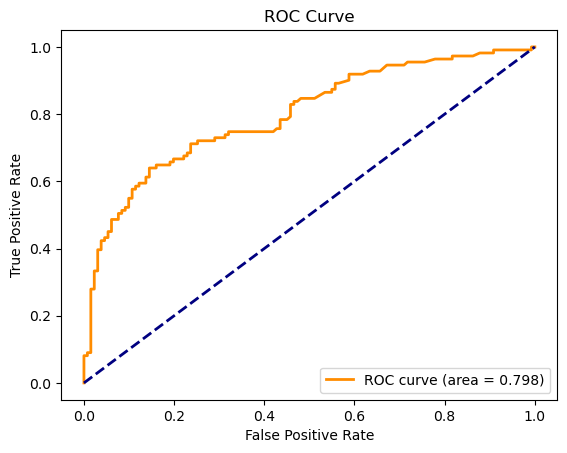

In [77]:
plot_roc(fpr_pew, tpr_pew, auc_pew)

The AUC for test dataset is 0.792. The AUC is closer to the value of 1 than it is to 0.5, which suggests that predictive probability threshold of 0.5 does an okay job of getting close to the ideal scenario of a false positive rate of 0 and true positive rate of 1. 

**viii)** Use your ROC to pick a good predictive probability threshold. Explain
why this is a good predictive probability threshold, given your research
goals

To pick a good probability threshold, I first need to identify  points of fpr and tpr that are closest to the ideal situation of fpr = 0 and tpr = 1. There are 2 options from the above ROC curve that stand out for this point:
- Option 1: Approximately (FPR = 0.1, TPR = 0.49)
    - Past the 0.1 mark of FPR, the FPR starts to level off. Decreasing the TPR further does not give me a substantial decrease in the FPR level. Hence, this is one option that could give result a probable predictive threshold
- Option 2: Approximately (FPR = 0.6, TPR = 0.92)
    - At the 0.93 mark, the TPR starts to level off. Since the TPR level is already 0.92 at this stage, increasing the FPR for a slight increase of 0.08 does not make much sense. Hence, this option could also result in an ideal predictive threshold
    
For my scenario, I believe the true positive rate is much more important than the false positive rate. My model predicts the patient's heart health i.e. if the patient has a heart disease or is normal. Getting a positive result that evnetually turns out to be false is not that big of a deal. It is more important to ensure that the patient's who have a heart disease definitely get a positive result. Getting a negative result could be life threatening. Hence, I will choose a predictive proability threshold that maximizes the TPR i.e. a probability threshold for option 2 (FPR=0.6, TPR=0.92).

In [78]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(df_train['target'], df_train['phat_test'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr  fpr
0       0.01  1.0  1.0
   threshold  tpr  fpr
0       0.02  1.0  1.0
   threshold  tpr  fpr
0       0.03  1.0  1.0
   threshold  tpr  fpr
0       0.04  1.0  1.0
   threshold  tpr  fpr
0       0.05  1.0  1.0
   threshold  tpr  fpr
0       0.06  1.0  1.0
   threshold  tpr       fpr
0       0.07  1.0  0.992366
   threshold       tpr       fpr
0       0.08  0.990991  0.992366
   threshold       tpr       fpr
0       0.09  0.990991  0.992366
   threshold       tpr       fpr
0        0.1  0.990991  0.984733
   threshold       tpr       fpr
0       0.11  0.990991  0.961832
   threshold       tpr       fpr
0       0.12  0.990991  0.938931
   threshold       tpr       fpr
0       0.13  0.990991  0.908397
   threshold       tpr      fpr
0       0.14  0.981982  0.89313
   threshold       tpr       fpr
0       0.15  0.972973  0.832061
   threshold       tpr       fpr
0       0.16  0.963964  0.816794
   threshold       tpr       f

As seen from the above result, the predictive probability threshold that most closely matches option 2 is **p = 0.22**

**ix)** Use this predictive probability threshold to classify your test data. What is
the false positive rate and the true positive rate of your classification of
the test data?

In [80]:
df_test['target_hat'] = df_test['phat_test'] > 0.22
df_test

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
11    56    0   1       140   294    0        2      153      0      1.3   
292   44    1   3       120   169    0        0      144      1      2.8   
269   42    1   2       130   180    0        0      150      0      0.0   
268   40    1   3       152   223    0        0      181      0      0.0   
94    63    0   2       135   252    0        2      172      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
95    52    1   3       128   255    0        0      161      1      0.0   
26    58    0   2       120   340    0        0      172      0      0.0   
259   57    1   1       124   261    0        0      141      0      0.3   
143   64    1   2       125   309    0        0      131      1      1.8   
42    71    0   1       160   302    0        0      162      0      0.4   

     slope  ca  thal  target  phat_test  target_hat  
11       1   0     1       0   0.478850        True  
292      2   0     2       1   0.797074        True  
269      0   0     1       0   0.270825        True  
268      0   0     3       1   0.118735       False  
94       0   0     1       0   0.153155       False  
..     ...  ..   ...     ...        ...         ...  
95       0   1     3       1   0.205829       False  
26       0   0     1       0   0.153155       False  
259      0   0     3       1   0.385949        True  
143      1   0     3       1   0.735187        True  
42       0   2     1       0   0.254631        True  

[61 rows x 16 columns]

In [81]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [82]:
confusion_matrix(y_true=df_test['target'], y_pred=df_test['target_hat'])
tn, fp, fn, tp = confusion_matrix(y_true=df_test['target'],
                                 y_pred=df_test['target_hat']).ravel()
(tn, fp, fn, tp)

(12, 21, 4, 24)

In [83]:
tpr = 24/(24+4)
fpr = 21/(21+12)
print(tpr, fpr)

0.8571428571428571 0.6363636363636364


The total positive rate is 0.8512 and the false positive rate 0.6363. Evaluating this value, I would probably take a higher threshold to ensure that my true postive rate is higher. This is because (as mentioned previously), having a high false positive rate is not harmful, however having a low true positive rate is extremely detrimental.

Discuss how your logistic regression analysis helps answer your research
question

The logistic regression shows the level of impact each of the explanatory variables have on the log odds of hearth health of a patient. As seen in my very first model, 'chol', 'trestbps', and 'oldpeak' had a positive relationship with the log odds hearth health of the patient (as suggested by the coefficient). Among these cholestrol was the least impactful with a slope of only 0.033. 'thalach' or heart rate showed a slight negative relationship with the response variable (log odds of heart health of patient). I also observed that my findings for 'thalach' and 'oldpeak' can be extended to the population (through the p value test) as there is enough evidence to suggest that their slopes are non-zero. 
 

## 6) Conclusion

**i)** Summarize the findings of your individual research questions in
the conclusion. Provide at least a paragraph

Research Questions:
1. <u>What is the relationship between age and the patient's blood pressure at rest? How does the relationship between these two change  if we segregate based on the sex of the patient?</u>
    - Through the use of a scatterplot, a line of best fit and an R squared value, I observed that there was no significant correlation between the age of a patient and their blood pressure at rest. This was an interesting observation to me because I've always assumed the older a person gets, the higher their blood pressure gets. In addition to this observation, I also saw that sex does not impact the relationship between age and the patient's blood pressure at rest. However, I did note that at a younger age (<50), women have a lower blood pressure level. But, as people get older (>50), women seem to be at a higher risk for increased blood pressure levels. While this could be purely coincidental (due to the extremely small difference in blood pressure levels between men and women), I did think it would be something interesting to look into further. 
    

2. <u>Are the average cholestrol levels in normal people equal to the average cholestrol levels in people with heart disease?</u>
    - Through a difference in population means hypothesis test, I observed that there is not enough evidence to suggest that patients with poor heart health have higher levels of cholestrol when compared to patients with normal heart health. While a small sample from Cleveland is not enough to make a definitive statement, it shed some light into my motivation for researching this question i.e. understanding if cholestrol is actually bad for you. 


3. <u>How is the blood pressure level (in mm/HG) affected by the cholestrol levels, maximum heart rate, exercise induced st depression and the age of the patient?</u>
    - Through my linear regression, I observed that I have enough evidence to suggest that the slopes for all my variables are non-zero. This implies that all the above variables have some impact (however small it may be) on the blood pressure level of a patient. Through the size of my coefficients, I identified the descending order of magnitude of impact these variables have on the blood pressure level. This order is: age, oldpeak, thalach, and cholestrol.  


4. <u>What is the relationship between cholestrol levels, blood pressure levels, maximum heart rate, exercise induced st depression and the heart health of the patient?</u>
    - Through my logistic regression, I learned how (direction and magnitude) each of the explanatory variables were related to the response variable. 'chol', 'trestbps', and 'oldpeak' had a positive relationship with the log odds hearth health of the patient (as suggested by the coefficient). 'thalach' or heart rate showed a slight negative relationship with the response variable (log odds of heart health of patient). I also observed that my findings for 'thalach' and 'oldpeak' can be extended to the population (through the p value test) as there is enough evidence to suggest that their slopes are non-zero. 


**ii)** If you (or someone else) were to conduct future work based on
these analyses, what kind of research questions or analyses might that entail?

- One path of research could be a modification to my descriptive analysis research question. My descritptive research question was: **What is the relationship between age and the patient's blood pressure at rest? How does the relationship between these two change  if we segregate based on the sex of the patient?** While seeing how the relatoinship changed based on sex was interesting, I believe a more applicable research question could be how the relationship (between age and blood pressure) changed based on the heart health of the patient. This would give a clearer idea of how closely age and heart health are related
- There are several variables in the dataset that have not been used in my research questions that could be explored. For example, while my analysis concluded that there is no significant relationship between cholestrol levels and heart diseases, maybe there exists a correlation between cholestrol levels and blood disorders like thalassemia. Similarly, I could also observe the relationship between age (or sex) and thalassemia. This would also give me relationships that could be potentially life saving in a real-world scenario
- Another important relationship that I think would be useful is the relationship between type of chest pain and age. This would show certain symptoms that people should take seriously when they age (if there is a positive relatoinship)